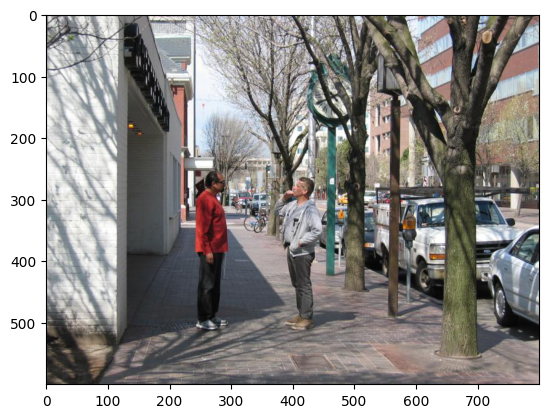

In [1]:
%reload_ext autoreload
%autoreload 2


from matplotlib import pyplot as plt
from matplotlib import image as mpimg

# Load the image
image_path = "crepe_data/VG_100K/1.jpg"
image = mpimg.imread(image_path)

# plt.title("Sheep Image")
# plt.xlabel("X pixel scaling")
# plt.ylabel("Y pixel scaling")
plt.imshow(image)
plt.show()

In [1]:
img_caption_file_name="crepe_data/prod_hard_negatives/prod_vg_hard_negs_swap_all.csv"

import pandas as pd
 
caption_pd = pd.read_csv(img_caption_file_name)

In [2]:
print(caption_pd.iloc[0]['caption'], caption_pd.iloc[1]['image_id'])
print(caption_pd.iloc[3]['caption'], caption_pd.iloc[3]['image_id'])

a car parked on a street next to a tree. the street has a parking meter and a lamp post. there are bikes near the tree. 5
a glass of water on a counter with an apple, a bag of food, and a chair with a leg. 6


In [3]:
len(caption_pd)

7405

In [6]:
from image_utils import load_crepe_datasets, load_other_crepe_images
import os

import IPython

data_path="/data2/wuyinjun/"
query_path=os.getcwd() #curr_dir = str(globals()["_dh"][0])
dataset_name="crepe"
full_data_path = os.path.join(data_path, dataset_name)

queries, raw_img_ls, sub_queries_ls, img_idx_ls,all_grouped_sub_q_ids_ls = load_crepe_datasets(full_data_path, query_path)
img_idx_ls, raw_img_ls = load_other_crepe_images(full_data_path, query_path, img_idx_ls, raw_img_ls)

 10%|▉         | 730/7405 [00:00<00:01, 3709.83it/s]

[['a car parked on a street', 'a street next to a tree', 'a street with a parking meter', 'a street with a lamp post', 'bikes near the tree.']]
[['computer on a floor', 'cables on a floor', 'a room with a heater']]
[['a glass of water on a counter', 'an apple on a counter', 'a bag of food on a counter', 'a chair with a leg on the counter']]
[['woman wearing a sweater', 'a wrist pad on her keyboard', 'her keyboard in front of a monitor', 'a sticky note taped to the monitor', 'a juice bottle next to monitor.']]
[['man with sleeves on a keyboard', 'a hand on a keyboard', 'a keyboard in front of a cpu', 'books on the cpu', 'a mouse next to the keyboard.']]
[['shelves with books', 'a baby on shelves', 'a wall with a corkboard', 'a wall with posters', 'shelves against a wall', 'a corkboard against a wall', 'posters against a wall', 'shelves with a baby', 'shelves with corkboard', 'shelves with posters', 'baby against corkboard', 'baby against posters.']]
[['computer on a desk', 'a desk with 

 26%|██▌       | 1891/7405 [00:00<00:01, 5238.42it/s]

[['people sitting on the side of the road watching an elephant entertain a person.']]
[['bus with a window', 'bus with a door', 'bus with an advertisement', 'people talking on the side of the bus']]
[['girl holding a bird', 'girl with eyes', 'a shirt with a button']]
[['a pizza on a paper plate', 'a cake on a knee.']]
[['a girl wearing sunglasses', 'a woman holding a phone', 'a woman holding a bracelet']]
[['dog on a black beach', 'a black beach under a sky with clouds', 'sky with clouds']]
[['a pillow with a polka dot design', 'a girl is laying on the pillow', 'a girl wearing a bra.']]
[['boy with blue eyes', 'boy with hair', 'boy wearing a white shirt', 'boy with a baseball glove', 'boy with blue eyes wearing a white shirt', 'boy with blue eyes and hair wearing a white shirt', 'boy with blue eyes and hair wearing a white shirt and baseball glove', 'boy wearing a white shirt and baseball glove', 'boy with blue eyes and hair wearing a baseball glove', 'boy with blue eyes wearing a whit

 44%|████▍     | 3285/7405 [00:00<00:00, 6256.34it/s]

[['clock inside a mirror on a stand', 'a stand with a frame', 'a stand on a wall with a baseboard', 'mirror on a stand with a frame', 'a wall with a baseboard.']]
[['a pizza on a counter', 'a counter with a case around it', 'the pizza has pans on the case', 'the pizza has a jar on the case', 'a jar on top of the case', 'a reflection of the jar.']]
[['girl with a backpack', 'girl with an umbrella walking in front of a house', 'the girl is wearing a white skirt', 'bushes in front of the house.']]
[['"two bears', 'one with a hat', 'near a truck with trash in it"']]
[['a woman on a surfboard', 'a cage behind a woman', 'a watch on a woman']]
[['"another bowl on a cloth with an orange in it', 'the another bowl has a reflection', 'the another bowl casts a shadow"']]
[['a skier coming down a hill', 'tracks to take to the hill', 'another skier walking up the hill.']]
[['there is a crack in the wall', 'there is a crack in the sidewalk', 'a woman is standing next to another woman', 'the first wom

 64%|██████▍   | 4766/7405 [00:00<00:00, 6876.20it/s]

[['"a person falling off a board into water', 'a splash behind them', 'a wave in the water"']]
[['man seated on a bench', 'another man seated on a bench', 'another man seated on a bench', 'a player to pants']]
[['a pastry with green frosting', 'a stick on the pastry', 'a sign on the pastry', 'a doughnut behind the sign.']]
[['an ostrich with a beak walking in the wild', 'it has a left leg', 'it has feathers', 'another ostrich with a long neck']]
[['a plate with leftovers on it', 'a sauce on top of the plate', 'a lasagne covering the sauce', 'a spoon behind the plate', 'a fork on the table.']]
[['woman holding a cheeseburger with a bun, tomatoes, and cheese', 'the woman has a necklace on']]
[['deer grazing in a field', 'another deer grazing in a field', 'a field with grass', 'an elephant grazing in a field', 'the zebra has stripes.']]
[['a crowd of people', 'a crowd of sheep', 'one man in the flock', 'an ear on one of the sheep']]
[['woman wearing a hat', 'woman wearing gloves', 'skis o

 94%|█████████▍| 6965/7405 [00:01<00:00, 7160.04it/s]

[['man looking at people at a festival', 'baskets on the ground']]
[['buggy with a design on the seat', 'a wheel on a buggy', 'a headlight on a buggy', 'a surfboard on top of a buggy.']]
[['bare trees on trail', 'trail has tracks', 'sign on tree', 'snow has tracks', 'snow pants are for snow']]
[['a junkyard with glass', 'a junkyard with tile', 'a junkyard with junk', 'a broken toilet on the ground', 'twigs next to the junk.']]
[['a basket with a wig', 'a basket with wires', 'a basket with shoe', 'a basket with flip flop', 'the flip flop has a black stripe.']]
[['a girl on a cell phone', 'a girl with a hat', 'holding a beer in a hand', 'a mirror in front of her.']]
[['photo of pants', 'another pants', 'a frisbee', 'a brown shoe', 'a girl wearing a green coat.']]
[['pen on a plate', 'blue flowers on a plate', 'almonds on a plate', 'a pie on a plate']]
[['gravel by street', 'stick by street', 'rooster in grass', 'foot on rooster']]


100%|██████████| 7405/7405 [00:01<00:00, 6385.15it/s]


[['start selling food', 'bags on step', 'power lies over step.']]


In [7]:
import torch
from transformers import CLIPModel, AutoProcessor
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# processor = ViTImageProcessor.from_pretrained('google/vit-large-patch16-224')
# model = ViTForImageClassification.from_pretrained('google/vit-large-patch16-224').to(device)
model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14").to(device)
# processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
raw_processor = AutoProcessor.from_pretrained("openai/clip-vit-large-patch14")
# processor =  lambda images: raw_processor(images=images, return_tensors="pt", padding=False, do_resize=False, do_center_crop=False)["pixel_values"]
processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
text_processor =  lambda text: raw_processor(text=[text], return_tensors="pt", padding=True, truncation=True)
img_processor =  lambda images: raw_processor(images=images, return_tensors="pt")["pixel_values"]
model = model.eval()

/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/torch/cuda/__init__.py:758: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845899/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
2024-06-12 02:08:51.879107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-12 02:08:52.727261: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
from image_utils import *

target_img_idx=0

print(img_file_name_ls)

new_raw_img_ls = [raw_img_ls[idx] for idx in range(10)]

cl = ConceptLearner(new_raw_img_ls, model, vit_forward, processor, dataset_name, device)

patch_count=4

sample_hash = utils.hashfn(img_file_name_ls)


new_img_file_name_ls = [img_file_name_ls[target_img_idx]]


# img_emb, patch_emb, masks, bboxes, img_per_patch = cl.get_patches(patch_count, images=new_raw_img_ls, method="slic", compute_img_emb=True)

cached_img_ls, img_emb, patch_emb, masks, bboxes, img_per_patch = cl.get_patches(patch_count, sample_hash, img_idx_ls=[target_img_idx], img_file_name_ls=new_img_file_name_ls, method="slic", compute_img_emb=True, save_mask_bbox=True)


# img_emb, patch_emb_ls, masks_ls, bboxes_ls, img_per_patch_ls = convert_samples_to_concepts(args, model, raw_img_ls, processor, device, patch_count_ls=patch_count_ls)




TypeError: get_patches() got an unexpected keyword argument 'images'

# plot decomposed images

3


/data6/wuyinjun/anaconda3/envs/test/lib/python3.8/site-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



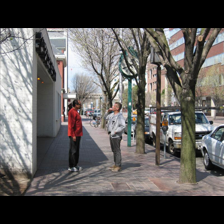
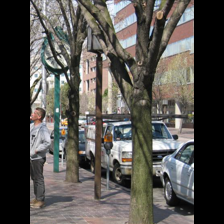
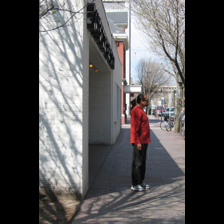


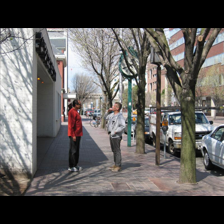
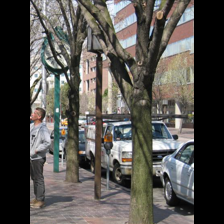
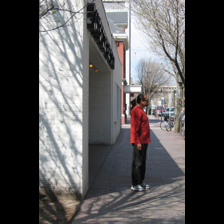

In [8]:
import matplotlib.pyplot as plt
import cv2
import PIL
import ipyplot

image_id = 0

first_mask = masks[image_id]

# print(len(first_mask))

first_img = raw_img_ls[image_id]

first_bbox_ls = bboxes[image_id]

print(len(first_bbox_ls))

masked_image_ls = []

for idx in range(len(first_bbox_ls)):
    first_bbox = first_bbox_ls[idx]
    # masked_image = np.copy(first_img)
    # # print(masked_image.shape)
    # masked_image[first_mask != (idx + 1)] = 255 # Set pixels outside the mask to 0
    curr_patch = PIL.Image.new('RGB', first_img.size)
    curr_patch.paste(first_img.copy().crop(first_bbox), box=first_bbox)
    masked_image = PIL.ImageOps.pad(curr_patch.crop(first_bbox), (224, 224))
    masked_image_ls.append(masked_image)


ipyplot.plot_images(masked_image_ls, max_images=len(first_bbox_ls))   


# masked_image = cv2.rectangle(Image.fromarray(masked_image), (first_bbox[0], first_bbox[1]), (first_bbox[2], first_bbox[3]), (255, 0, 0), 2)

# Display the masked part of the image
# plt.imshow(masked_image)
# plt.axis('off')
# plt.show()

# print(np.unique(first_mask))

3



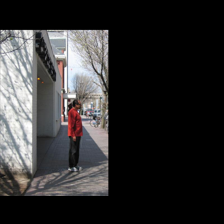
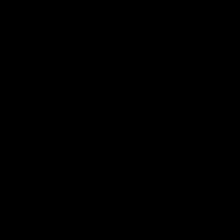
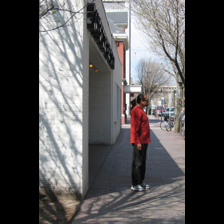


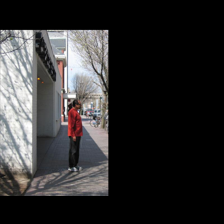
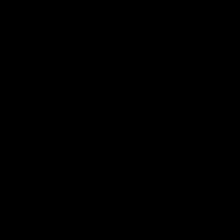
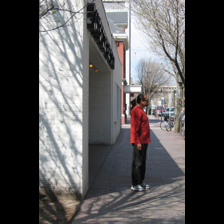

In [11]:
import matplotlib.pyplot as plt
import cv2
import PIL
import ipyplot

image_id = 0

first_mask = masks[image_id]

# print(len(first_mask))

first_img = raw_img_ls[image_id]

first_bbox_ls = bboxes[image_id]

print(len(first_bbox_ls))

masked_image_ls = []

for idx in range(len(first_bbox_ls)):
    first_bbox = first_bbox_ls[idx]
    masked_image = np.copy(first_img)
    # print(masked_image.shape)
    masked_image[first_mask != (idx + 1)] = 255 # Set pixels outside the mask to 0
    # curr_patch = PIL.Image.new('RGB', first_img.size)
    # curr_patch.paste(first_img.copy().crop(first_bbox), box=first_bbox)
    # masked_image = PIL.ImageOps.pad(curr_patch.crop(first_bbox), (224, 224))
    masked_image_ls.append(masked_image)


ipyplot.plot_images(masked_image_ls, max_images=len(first_bbox_ls))   


# masked_image = cv2.rectangle(Image.fromarray(masked_image), (first_bbox[0], first_bbox[1]), (first_bbox[2], first_bbox[3]), (255, 0, 0), 2)

# Display the masked part of the image
# plt.imshow(masked_image)
# plt.axis('off')
# plt.show()

# print(np.unique(first_mask))

In [9]:
sub_idx_ls = np.nonzero(np.array(img_per_patch) == 0)[0].tolist()
first_patch_emb = np.stack([patch_emb[idx] for idx in sub_idx_ls])
print(first_patch_emb.shape)
print(len(bboxes[0]))

(3, 768)
3


In [10]:
# query="the street has a parking meter and a lamp post"
query="the street has a parking meter"
# query = "a car parked on a street next to a tree. "
inputs = text_processor(query)
inputs = {key: val.to(device) for key, val in inputs.items()}
text_features = model.get_text_features(**inputs)
print(text_features.shape)

torch.Size([1, 768])


In [ ]:
cosin_sim1_ls = []
for idx in range(len(first_patch_emb)):
    cosin_sim1 = torch.nn.functional.cosine_similarity(text_features, torch.from_numpy(first_patch_emb[idx]).view(1,-1).to(device), dim=-1)
    # print(idx, cosin_sim1)
    cosin_sim1_ls.append(cosin_sim1)
cosin_sim2 = torch.nn.functional.cosine_similarity(text_features, img_emb[0].view(1,-1).to(device), dim=-1)

print(cosin_sim1, cosin_sim2)

cosin_sim1_tensor=torch.tensor(cosin_sim1_ls).view(-1)
cosin_sim1_max_idx=torch.argmax(cosin_sim1_tensor)
cosin_sim1_max=torch.max(cosin_sim1_tensor)
print("max cosine score::", cosin_sim1_max_idx, cosin_sim1_max)


bbox = first_bbox_ls[cosin_sim1_max_idx]
curr_patch = PIL.Image.new('RGB', first_img.size)
curr_patch.paste(first_img.copy().crop(bbox), box=bbox)
masked_image = curr_patch #PIL.ImageOps.pad(curr_patch.crop(bbox), (224, 224))

plt.figure(figsize=(20,20))

plt.imshow(masked_image)

plt.axis('off')
plt.show()

In [ ]:
print(np.unique(first_mask))
print(np.sum(first_mask == 15), np.sum(first_mask == 4))
compound_mask = np.logical_or(first_mask == 15, first_mask == 4)

print(np.sum(compound_mask))

y_ls, x_ls = np.nonzero(compound_mask)

x1, y1, x2, y2 = np.min(x_ls), np.min(y_ls), np.max(x_ls), np.max(y_ls)
compound_box = [x1, y1, x2, y2]
print(compound_box)


curr_patch = PIL.Image.new('RGB', first_img.size)
curr_patch.paste(first_img.copy().crop(compound_box), box=compound_box)
masked_image = PIL.ImageOps.pad(curr_patch.crop(compound_box), (224, 224))

plt.figure(figsize=(20,20))

plt.imshow(masked_image)

plt.axis('off')
plt.show()

In [ ]:

masked_image_emb, masked_img_for_patch = get_patches_from_bboxes(cl.input_to_latent, cl.model, [first_img], [[compound_box]], cl.input_processor, device=cl.device, resize=cl.image_size)
print(masked_image_emb.shape)

In [ ]:
cosin_sim3 = torch.nn.functional.cosine_similarity(text_features, masked_image_emb.view(1,-1).to(device), dim=-1)
print(cosin_sim3)

In [ ]:
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor


def segment_one_image(image):
    checkpoint_path="/data2/wuyinjun/sam/sam_vit_h_4b8939.pth"
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    sam = sam_model_registry["vit_h"](checkpoint=checkpoint_path)
    sam.to(device=device)
    mask_generator = SamAutomaticMaskGenerator(sam, points_per_side=64,
                                            )
    masks = mask_generator.generate(image)

    print(len(masks))
    return masks

masks = segment_one_image(np.array(raw_img_ls[0]))
# predictor = SamPredictor(sam)
# predictor.set_image(raw_img_ls[0])
# masks, _, _ = predictor.predict()

In [ ]:
print(list(masks[0].keys()))
print(np.sum(masks[0]['segmentation']), masks[0]["area"])

In [ ]:
print(masks[4])
print(masks[1])

In [ ]:
import cv2
def generate_dialated_mask(mask, dilation_size=5):
    kernel = np.ones((dilation_size, dilation_size), np.uint8)

    binary_image = np.array(mask).astype(np.uint8)

    # Perform dilation
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
    # from skimage.morphology import disk, dilation
    # selem = disk(dilation_size)
    # return dilation(mask, selem)
    return dilated_image


def generate_dialated_mask_ls(segmentations, dilation_size=10):
    return [generate_dialated_mask(segment['segmentation'], dilation_size) for segment in segmentations]


dilated_masks = generate_dialated_mask_ls(masks)

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    
import cv2
image = np.array(raw_img_ls[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20,20))
masked_image = np.copy(raw_img_ls[0])
# masked_image[np.logical_and(~masks[2]['segmentation'], ~masks[1]['segmentation'])] = 255
# masked_image[~masks[4]['segmentation']] = 255
plt.imshow(masked_image)
# show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
import cv2
def are_segments_neighbors(seg1_mask, seg2_mask):
    """Check if two image segments are neighbors using connected component labeling."""
    # Find contours for the segments
    # seg1_mask = Image.fromarray(seg1_mask)
    # seg2_mask = Image.fromarray(seg2_mask)
    
    contours1, _ = cv2.findContours(seg1_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours2, _ = cv2.findContours(seg2_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Check if any contour from one segment intersects with any contour from the other segment
    for contour1 in contours1:
        for contour2 in contours2:
            intersection = cv2.pointPolygonTest(contour2, tuple(contour1[0][0]), measureDist=False)
            if intersection == 0 or intersection == 1:
                return True  # Contours intersect, segments are neighbors
    return False

def are_segments_neighbors0(seg1_mask, seg2_mask):
    intersection = np.logical_and(seg1_mask, seg2_mask)
    return np.any(intersection)


# is_neighbor = are_segments_neighbors(masks[1]['segmentation'].astype(np.uint8), masks[2]['segmentation'].astype(np.uint8))
is_neighbor = are_segments_neighbors0(dilated_masks[1], dilated_masks[2])
print(is_neighbor)

In [ ]:
gray = cv2.cvtColor(np.array(raw_img_ls[0]),cv2.COLOR_BGR2GRAY)
_,binary = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

image,contours = cv2.findContours(binary,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
print(binary.dtype)
print(masks[1]['segmentation'])

In [ ]:
def derive_all_neighbors(mask_ls):

    neighbor_mapping_ls = []
    for i in range(len(mask_ls)):
        curr_neighbors = []
        for j in range(len(mask_ls)):
            if j != i:
                # is_neighbor = are_segments_neighbors(masks[i]['segmentation'], masks[j]['segmentation'])
                is_neighbor = are_segments_neighbors0(mask_ls[i], mask_ls[j])
                if is_neighbor:
                    curr_neighbors.append(j)
        neighbor_mapping_ls.append(curr_neighbors)
    return neighbor_mapping_ls

neighbor_mapping_ls = derive_all_neighbors(dilated_masks)
print(neighbor_mapping_ls[4])

In [ ]:
all_mask = np.zeros(masks[0]['segmentation'].shape).astype(bool)
for idx in neighbor_mapping_ls[4]:
    print(idx)
    all_mask = np.logical_or(all_mask, masks[idx]['segmentation'])

all_mask = np.logical_or(all_mask, masks[4]['segmentation'])

In [ ]:
print(masks[4])

In [ ]:
kernel = np.ones((3, 3), np.uint8)

binary_image = np.array(masks[1]['segmentation']).astype(np.uint8)

# Perform dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

In [ ]:
print(np.sum(binary_image))
print(np.unique(dilated_image))

In [ ]:
raw_img_ls[0].size

In [ ]:
# tree:0, 10
# car:13
import ipyplot
# fig, axes = plt.subplots(10, 1, figsize=(12, 8))

def show_all_masked_image_ls(raw_img, masks):

        masked_image_ls = []

        # for i, ax in enumerate(axes.flat):
        for i in range(len(masks)):
                # if i < 10:
                masked_image = np.copy(raw_img)
                masked_image[~masks[i]['segmentation']] = 255
                masked_image_ls.append(masked_image)
                # masked_image = Image.fromarray(masked_image)
                # ax.imshow(masked_image.resize(12, 8))
                # ax.axis("off")

        ipyplot.plot_images(masked_image_ls, max_images=len(masks))   

show_all_masked_image_ls(raw_img_ls[0], masks)
        # ax.set_title(f"Segment {i}")
# plt.show()
        # else:
        #     ax.axis("off")


# plt.figure(figsize=(20,20))
# for idx in range(len(masks)):
#     masked_image = np.copy(raw_img_ls[0])
#     masked_image[~masks[idx]['segmentation']] = 255
# # masked_image[~all_mask.astype(bool)] = 255
#     plt.imshow(masked_image)
#     plt.title(f"Segment {idx}")
# # show_anns(masks)
#     plt.axis('off')
# plt.show()

In [ ]:
all_mask = np.zeros(masks[0]['segmentation'].shape).astype(bool)
# mask_id_ls = [2,29,130]
# mask_id_ls = range(120,124)
# mask_id_ls=[0,2,9,82,135,124]
mask_id_ls=[0,9,82,135,124]
# for idx in range(len(masks)):
for idx in mask_id_ls:
    # print(idx)
    all_mask = np.logical_or(all_mask, masks[idx]['segmentation'])

plt.figure(figsize=(20,20))
# for idx in range(len(masks)):
masked_image = np.copy(raw_img_ls[0])
masked_image[~all_mask] = 255
# masked_image[~all_mask.astype(bool)] = 255
plt.imshow(masked_image)
plt.title(f"Segment {idx}")
# show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
masked_image_emb = get_image_embeddings([masked_image], cl.input_processor, cl.input_to_latent, cl.model, not_normalize=False)

In [ ]:
cosin_sim4 = torch.nn.functional.cosine_similarity(text_features, masked_image_emb.view(1,-1).to(device), dim=-1)
print(cosin_sim4)